In [ ]:
! pip install split-folders

# Import the Libraries

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Activation
from keras.preprocessing.image import ImageDataGenerator
import splitfolders
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('dark_background')

# Check the GPU

In [ ]:
print('GPU name: ', tf.config.experimental.list_physical_devices('GPU'))

GPU name:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
            logical_gpus = tf.config.experimental.list_logical_devices('GPU')
            print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        print(e)

1 Physical GPUs, 1 Logical GPUs


# Mount the drive and set the path

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Course Material/Supervised Machine Learning/Neural Networks for Classification_TF

/content/drive/MyDrive/Neural Network for classification Tensorflow


# Split the folder into train and test and Prepare train and test datasets, Loaders


In [ ]:
splitfolders.ratio("Circle_Cross", output="TrainTest",
    seed=1337, ratio=(.8, .2), group_prefix=None, move=False) # default values

Copying files: 2001 files [01:05, 30.41 files/s]


# Generating Train and Test Data Generators

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
num_classes = 2
img_shape = (116,116,3)
batch_size = 32

## Creating Training and Testing Dataset

In [ ]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Neural Network for classification Tensorflow/TrainTest/train',
                                                 target_size = (116,116),
                                                 class_mode='binary',
                                                 shuffle = True,
                                                 batch_size = batch_size)


Found 1599 images belonging to 2 classes.


In [ ]:
test_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Neural Network for classification Tensorflow/TrainTest/val',
                                                 target_size = (116,116),
                                                 class_mode='binary',
                                                 shuffle = False,
                                                 batch_size = batch_size)


Found 401 images belonging to 2 classes.


## Define the model

In [ ]:
model = Sequential()
model.add(Flatten(input_shape = [116,116,3]))  # 116 x 116 x 3 = 40368
model.add(Dense(units = 2048, activation = 'relu'))
model.add(Dense(units = 2048, activation = 'relu'))
model.add(Dense(units = 1024, activation = 'relu'))
model.add(Dense(units = 512, activation = 'relu'))
model.add(Dense(units = 256, activation = 'relu'))
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dense(units = 1, activation = 'sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 40368)             0         
                                                                 
 dense (Dense)               (None, 2048)              82675712  
                                                                 
 dense_1 (Dense)             (None, 2048)              4196352   
                                                                 
 dense_2 (Dense)             (None, 1024)              2098176   
                                                                 
 dense_3 (Dense)             (None, 512)               524800    
                                                                 
 dense_4 (Dense)             (None, 256)               131328    
                                                                 
 dense_5 (Dense)             (None, 128)               3

In [ ]:
model.compile(optimizer = tf.keras.optimizers.SGD(learning_rate = 0.001, momentum = 0.9) ,loss='binary_crossentropy', metrics=['accuracy'])

## Train and Test the model

In [ ]:
hist = model.fit(training_set, epochs = 36, validation_data = test_set)

Epoch 1/36
50/50 [==============================] - 10s 137ms/step - loss: 0.6381 - accuracy: 0.6129 - val_loss: 0.6825 - val_accuracy: 0.4988
Epoch 2/36
50/50 [==============================] - 7s 132ms/step - loss: 0.4044 - accuracy: 0.8168 - val_loss: 0.2264 - val_accuracy: 0.9401
Epoch 3/36
50/50 [==============================] - 7s 134ms/step - loss: 0.3417 - accuracy: 0.8487 - val_loss: 0.4169 - val_accuracy: 0.8279
Epoch 4/36
50/50 [==============================] - 6s 126ms/step - loss: 0.2834 - accuracy: 0.8881 - val_loss: 0.5133 - val_accuracy: 0.6334
Epoch 5/36
50/50 [==============================] - 7s 145ms/step - loss: 0.3161 - accuracy: 0.8649 - val_loss: 0.5401 - val_accuracy: 0.6185
Epoch 6/36
50/50 [==============================] - 6s 125ms/step - loss: 0.3393 - accuracy: 0.8593 - val_loss: 0.3853 - val_accuracy: 0.7880
Epoch 7/36
50/50 [==============================] - 8s 162ms/step - loss: 0.1698 - accuracy: 0.9381 - val_loss: 0.0842 - val_accuracy: 0.9676
Epoch

In [ ]:
trainAcc = [100 * x for x in hist.history['accuracy']]
testAcc = [100 * x for x in hist.history['val_accuracy']]

# Visualize the performance of model

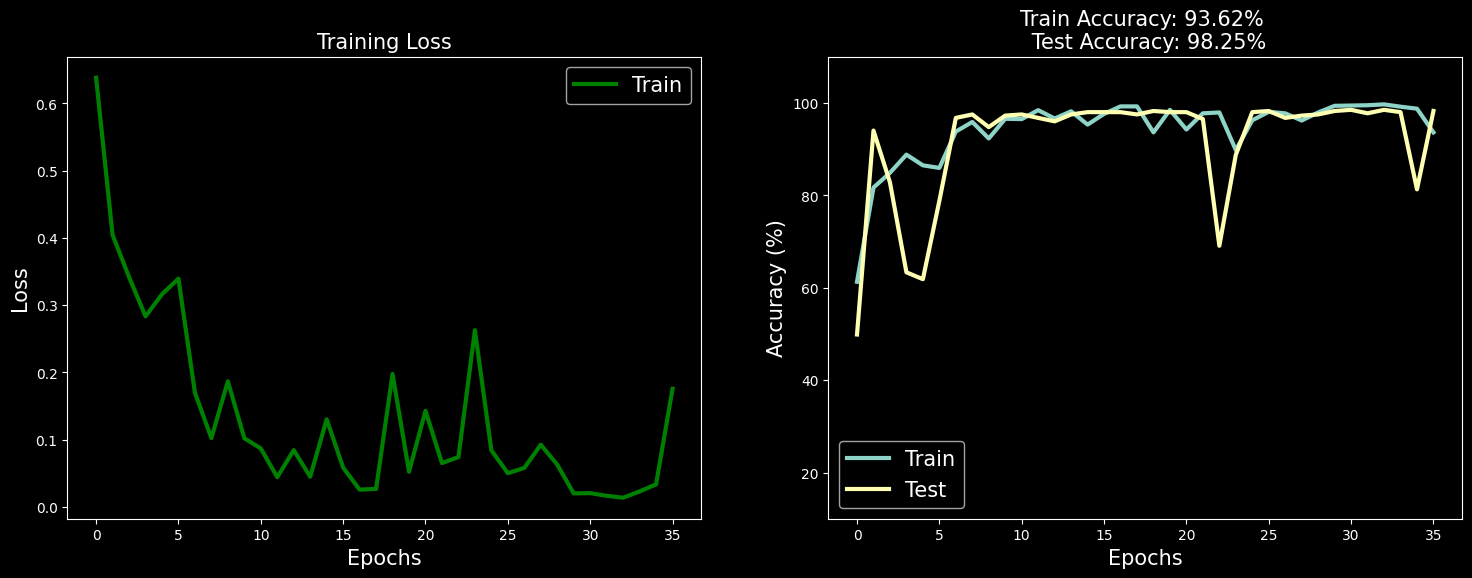

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(18,6))

ax[0].plot(hist.history['loss'], 'g', lw = 3, label = 'Train')
ax[0].set_xlabel('Epochs', fontsize = 15)
ax[0].set_ylabel('Loss', fontsize = 15)
ax[0].legend(fontsize = 15)
ax[0].set_title('Training Loss', fontsize = 15)


ax[1].plot(trainAcc, label ='Train', lw = 3)
ax[1].plot(testAcc, label ='Test', lw = 3)
ax[1].set_xlabel('Epochs', fontsize = 15)
ax[1].set_ylabel('Accuracy (%)', fontsize = 15)
ax[1].set_ylim([10,110])
ax[1].set_title(f'Train Accuracy: {trainAcc[-1]:.2f}% \n Test Accuracy: {testAcc[-1]:.2f}%', fontsize = 15)
ax[1].legend(fontsize = 15)

plt.show()